# Data Analysis 入門

## 1. 廣告

![PyDay](images/pyday.png)

### 政大 PyDay

* 日期: 6 月 8 日 (一)
* 時間: 上午 10:00 -- 下午 3:00
* 地點: [創新與創造力研究中心](http://www.ccis.nccu.edu.tw)

## 2. 資料型態: 當 Array 進來

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


我們知道 (在 information theory/digital signal processing)

$$\mbox{sinc}(x) = \frac{\sin(\pi x)}{\pi x}$$

### 動作 1: 畫個圖

In [2]:
x = linspace(-10, 10, 1000)

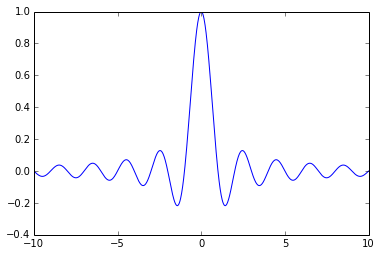

In [3]:
plot(x, sinc(x))

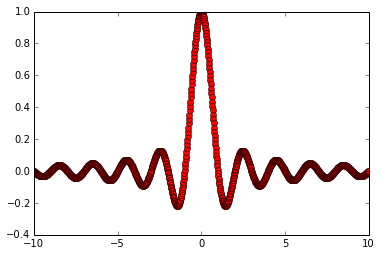

In [4]:
y = sinc(x)
plot(x, y, 'ro')

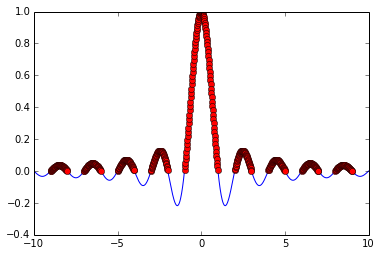

In [5]:
plot(x, y)
plot(x[y>0], y[y>0], 'ro')

### 動作 2: 改變 array 的 shape

In [6]:
x.shape = (20,50)

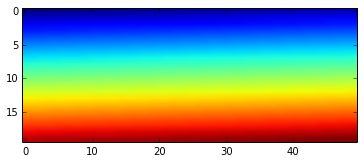

In [7]:
imshow(x)

## 3. Data Analysis 基本上是『找函數』的工作

### 主題 1: 函數

用數學的角度來說, 資料分析大概可以看成「找函數」的工作。

    f(x) = y

#### [例子]

輸入一個時間 x, 函數告訴你 x 時『政大女生第二宿舍』氣溫。

![dorm](images/dorm.png)

    f(x) = 在 x 時『政大女生第二宿舍』的溫度

#### [例子]

某公司做客戶分析, 把客戶分成三類:

* 1: 不用花什麼力氣就是我們忠實粉絲
* 2: 有可能成為客戶但要努力說服
* 3: 別傻了, 這人不會理我們的

我們自然希望把某一個人 x 放進我們的神秘函數, 函數就告訴我們他是哪一類的人:

    f(x) = x 這個人是哪一類
    
很棒吧? 等等, x 這個人電腦怎麼「輸入」? 所以我們會用某些可量化數據方式表式, 例如:

    x = {'血型':'O', '星座':'射手座', 'A產品':27, 
    'B產品':0, ...}
    
耶, 血型星座不是數字啊, 但我們可以用 1 表 A 型, 2 表 B 型, 等等。所以 x 總結可能是一個 list:

    x = [3, 1, 27, 0, ...]

#### [例子]

於是我們知道, 人可以「輸入」後, 世界又更寛廣了。比方說我們還可以做個「配對函數」, 輸入 x, y 兩個人, 得到:

    f(x,y) = x 和 y 的素配指數

### 主題 2: 兩大學函數的方法

基本上我們學函數大約有兩種方式:

* regression (迴歸)
* interpolation (插值)


## 5. 迴歸法

### 主題 1: 做個假的資料準備迴歸一下

我們來一條線, 比如說

    f(x) = 1.2x + 0.8

我們想說, 做個「假」的資料, 讓 Python 真的學。準備好個 50 個點

In [8]:
x = linspace(0,5,50)

來, 我們來「模擬」...

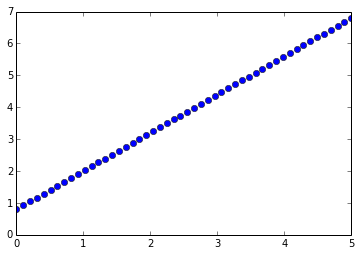

In [9]:
plot(x, 1.2*x + 0.8, 'o')

來來來, 快來學...

(拜託, 這再鳥的都會學起來)

對應的 y　就是我們要學的, 但是你弄得 y 都剛好是 $1.2x + 0.8$ 的話...

怎麼學都是 100% 像啊。

所以, 就像真實的世界, 我們加入 noise。

In [10]:
y = 1.2*x + 0.8 + 0.5*randn(50)

看看我們目前取的點, 附上「完全正確的」函數。

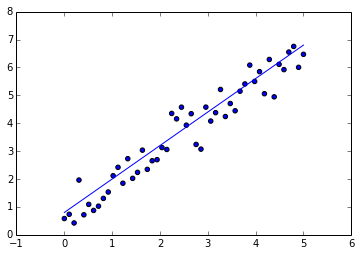

In [11]:
scatter(x,y)
plot(x,1.2*x + 0.8,'b');

### 主題 2: 迴歸!!

線性迴歸很多套件會做, 我們這裡介紹的方法好處是你只要預想好這些資料長得很像什麼函數, 我們都可以迴歸! 不一定要線性函數!

在我們線性的例子很容易。我們先做一個目標函數
    
    f(x) = ax + b

再來算 a, b 這樣。

In [12]:
from scipy.optimize import curve_fit

我們可以自已訂要學的函數形態!!

In [13]:
def f(x, a, b):
    return a*x + b

我們「學習的資料」就是剛剛的 x, y。傳回的 popt 這裡就是最小平方法下得到的 a, b。

In [14]:
popt, pcov = curve_fit(f, x, y)

In [15]:
popt

array([ 1.20806201,  0.61773277])

In [16]:
a, b = popt

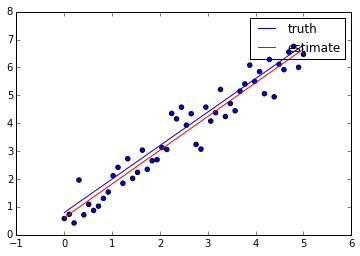

In [17]:
scatter(x,y)
plot(x,1.2*x + 0.8,'b',label="truth")
plot(x, a*x + b, 'r',label="estimate")
ax = gca()
ax.legend();

## 6. 插值法

### 主題 1: 插值法就是完全命中!

完全命中沒有想像中的了不起!

In [18]:
x1 = randn(10)
y1 = randn(10)

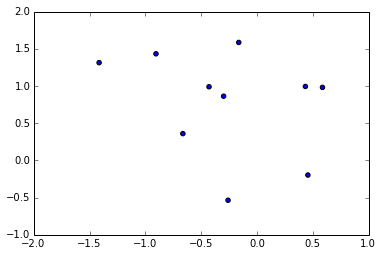

In [19]:
scatter(x1, y1)

In [20]:
def fit_points(n):
    scatter(x1, y1, s=50)
    x = linspace(-2,2,100)
    plot(x, 2*sin(n*x), 'r')

In [21]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<function __main__.fit_points>

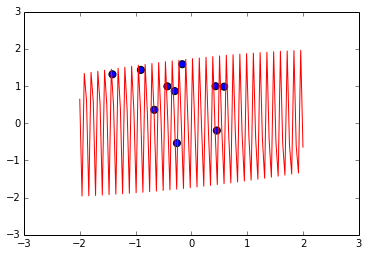

In [22]:
interact(fit_points, n=(5,100))

### 主題 2: 準備資料給插值法

假設我們有個精準的資料, 就是這個函數

    f(x) = sin(x) + 0.5x

In [23]:
x = linspace(0, 10, 15)
y = sin(x) + 0.5 * x

為了畫圖, 我們要多取一些點, 叫 xx 好了。

In [24]:
xx = linspace(0, 10, 100)

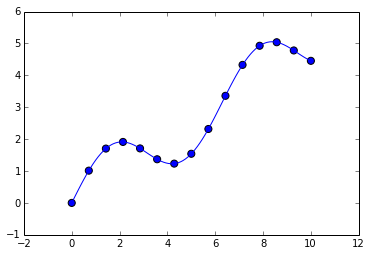

In [25]:
scatter(x, y, s=50)
plot(xx, sin(xx) + 0.5*xx, 'b');

### 主題 3: 不要太過度學習

我們準備再呼叫一下 SciPy 來做 "Cubic Spline" 的插值法!

In [26]:
from scipy.interpolate import interp1d

In [27]:
f = interp1d(x, y, kind='cubic')

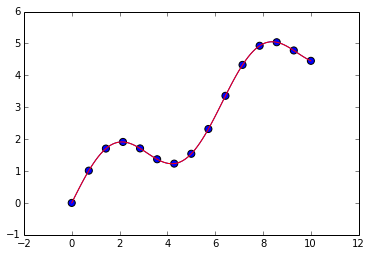

In [28]:
scatter(x, y, s=50)
plot(xx, sin(xx) + 0.5*xx, 'b') # 真正的
plot(xx, f(xx), 'r');

## 7. 假裝我們好像很懂機器學習

在機器學習的分類 (其實也是一個學函數的過程) 大致有

* supervised learning (監督式學習)
* unsupervised learning (非監督式學習)

我們各舉一例, 假裝我們好像很懂。

### 主題 1: SVM 支持向量機

SVM (Support Vector Machines) 是用直線、曲線、平面、曲面等等把各類資料分開的方式。

來個很簡單的分類。

#### [例子]

第一類:
(-1, -1), (-2, -1)

第二類:
(1, 1), (2, 1)

這樣告訴 Python 什麼樣的點是哪一類。

In [29]:
X = array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = array([1, 1, 2, 2])

### 主題 2: 使用 scikit-learn (sklearn)

In [30]:
from sklearn.svm import SVC

In [31]:
clf = SVC()

In [32]:
clf.fit(X,Y)

/Users/mac/anaconda/envs/py33/lib/python3.3/site-packages/sklearn/svm/base.py:233: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  max_iter=self.max_iter, random_seed=random_seed)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

用我們學成的函數預測新的資料

In [33]:
clf.predict([[-0.8,-1]])

array([1])

原始資料畫出來

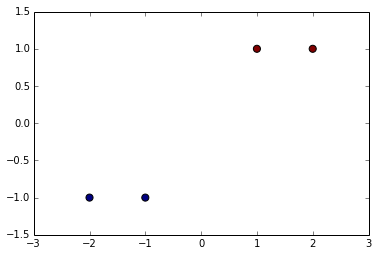

In [34]:
scatter(X[:,0], X[:,1],s=50,c=Y);

放一堆資料讓它分類看看

In [35]:
gd = array([[i,j] for i in arange(-2.5, 2.5, 0.2) 
 for j in arange(-2.5, 2.5, 0.2)])

In [36]:
gdc = clf.predict(gd)

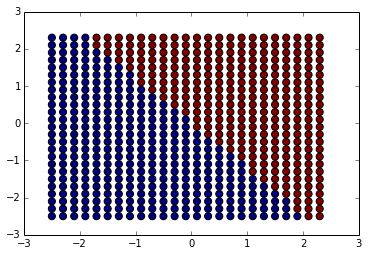

In [37]:
scatter(gd[:,0], gd[:,1], s=50, c=gdc);

### 主題 3: 生出假的資料給 SVM

剛剛的例子太簡單, 我們照例來生生假的訓練資料。sciket-leran 居然也想到要幫我們做這件事。

In [38]:
from sklearn.datasets import make_classification

平面上隨便抽點分三類。

In [39]:
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)

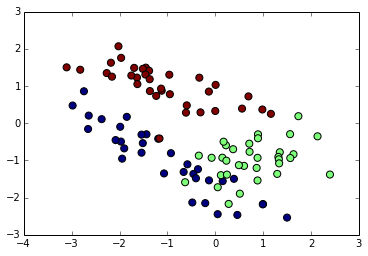

In [40]:
scatter(X[:,0], X[:,1], s=50, c=Y);

In [41]:
clf = SVC()

In [42]:
clf.fit(X,Y)

/Users/mac/anaconda/envs/py33/lib/python3.3/site-packages/sklearn/svm/base.py:233: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  max_iter=self.max_iter, random_seed=random_seed)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

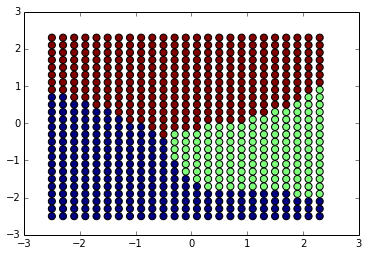

In [43]:
gdc = clf.predict(gd)
scatter(gd[:,0], gd[:,1], s=50, c=gdc);

## 9. K-Mean 是自動分類

所謂非監督式學習就是「沒有標準解答」的學習。比如說們處理一些數據, 本來沒有分類, 讓電腦自動分類。

K-mean 是這種的方法。

In [44]:
X = randn(50,2)

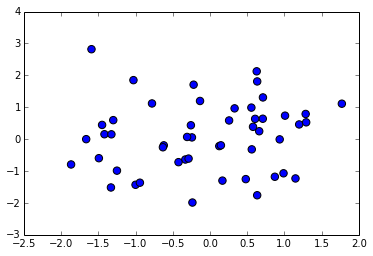

In [45]:
scatter(X[:,0], X[:,1], s=55);

In [46]:
from sklearn.cluster import KMeans

In [47]:
clf = KMeans(n_clusters=3)

In [48]:
clf.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [49]:
clf.labels_

array([0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1,
       1, 2, 0, 2], dtype=int32)

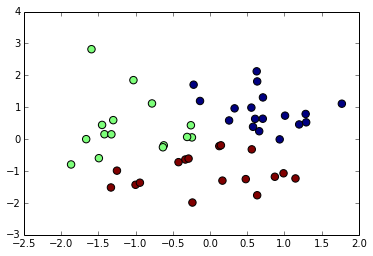

In [50]:
scatter(X[:,0], X[:,1], s=55, c=clf.labels_)

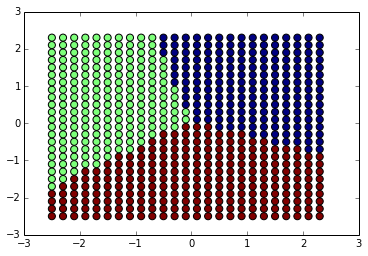

In [51]:
gdc = clf.predict(gd)
scatter(gd[:,0], gd[:,1], s=50, c=gdc);